In [1]:
using Revise

In [2]:
using QuantumStates

[ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f]


In [3]:
H_operator = :(
    AX * Rotation_A +
    BX * Rotation_B + 
    CX * Rotation_C
);

In [128]:
parameters = @params begin
    AX = 9.693322e3
    BX = 0.142141e3
    CX = 0.139304e3
end;

In [129]:
QN_bounds = (S = 1/2, I = 1/2, N = 0:1)
basis = enumerate_states(AsymmetricTopMolecule, QN_bounds)
;

In [130]:
H = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time evaluate!(H)
@time solve!(H)
;

  0.002100 seconds (141 allocations: 532.938 KiB)
  0.000029 seconds
  0.001922 seconds (223 allocations: 167.094 KiB)


In [131]:
using Plots

In [135]:
using LinearAlgebra

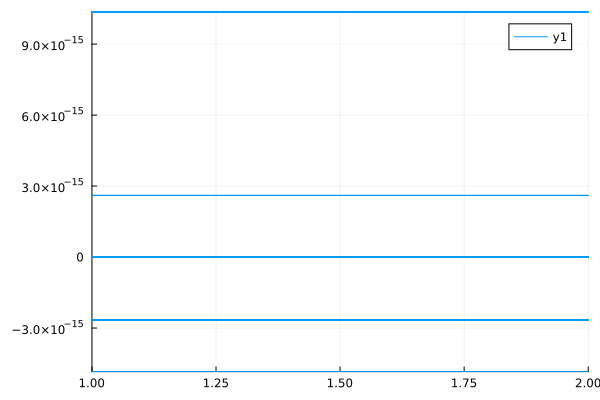

In [132]:
hline(energy.(H.states))

In [6]:
@time save_to_file(H, "CaSH_X", "")

  0.177877 seconds (465.20 k allocations: 30.854 MiB, 10.28% gc time, 98.62% compilation time)
